Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None
Missing Values:
Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64
Model Performance:
MSE: 549237739

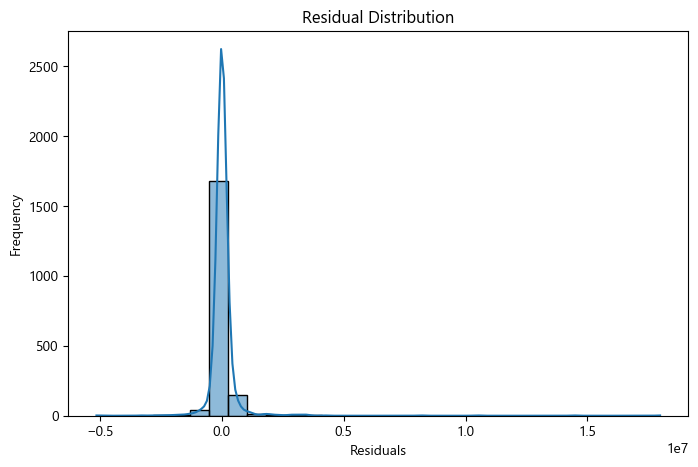

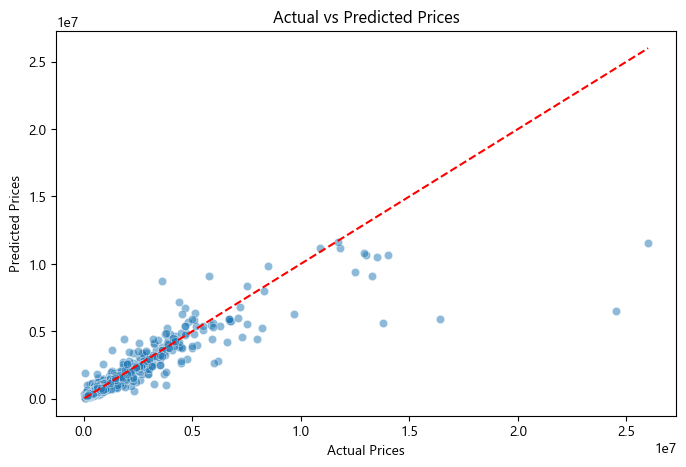

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings

# Suppress warnings for missing fonts (optional)
warnings.filterwarnings("ignore", category=UserWarning)

# Set a font that supports Devanagari script (if needed)
matplotlib.rcParams['font.family'] = 'Nirmala UI'  # Works on Windows
# matplotlib.rcParams['font.family'] = 'Lohit Devanagari'  # Use for Linux users

# Step 1: Load the Dataset
df = pd.read_csv('used_car_dataset.csv')

# Step 2: Data Preprocessing
print("Initial Data Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

# Clean the 'AskPrice' column to remove currency symbols and commas, and convert it to numeric
df['AskPrice'] = df['AskPrice'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Drop rows with missing target values (assuming 'AskPrice' is the target column)
df = df.dropna(subset=['AskPrice'])

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Rename columns to remove non-ASCII characters (if necessary)
df.columns = [col.encode('ascii', 'ignore').decode('utf-8') for col in df.columns]

# Step 3: Encode categorical variables, excluding 'AskPrice' from the encoding
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'AskPrice']  # Exclude 'AskPrice'
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 4: Feature Selection
X = df.drop(columns=['AskPrice'])  # Features
y = df['AskPrice']  # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance:\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")

# Step 8: Save the Model
joblib.dump(model, "used_car_price_model.pkl")
print("Model saved as used_car_price_model.pkl")

# Step 9: Model Performance Visualization

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Fe
